In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

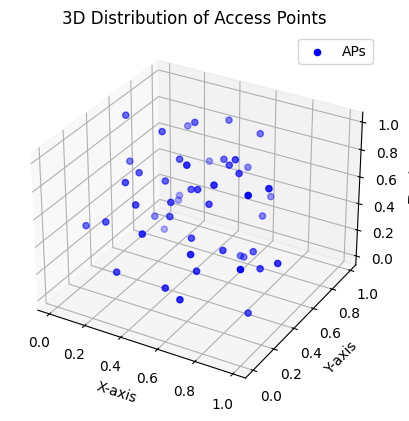

In [13]:
np.random.seed(42)

# Define the dimensions of the coverage area
x_length = 100  # meters
y_length = 100  # meters
z_length = 20   # meters (typical indoor height)

# Number of APs and users
n_aps = 100
n_users = 20

# Generate AP positions
x_pos_aps = np.random.uniform(0, x_length, n_aps)
y_pos_aps = np.random.uniform(0, y_length, n_aps)
z_pos_aps = np.random.normal(z_length/2, z_length/4, n_aps)  # Most APs at middle height with some variation
z_pos_aps = np.clip(z_pos_aps, 0, z_length)

# Generate user positions
x_pos_users = np.random.uniform(0, x_length, n_users)
y_pos_users = np.random.uniform(0, y_length, n_users)
z_pos_users = np.random.normal(z_length/2, z_length/6, n_users)  # Users are typically at middle height with less variation
z_pos_users = np.clip(z_pos_users, 0, z_length)

# Combine positions into feature matrices
X_aps = np.column_stack((x_pos_aps, y_pos_aps, z_pos_aps))
X_users = np.column_stack((x_pos_users, y_pos_users, z_pos_users))

# Perform K-means clustering for APs only
n_clusters = 5
kmeans_aps = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=42)
cluster_labels_aps = kmeans_aps.fit_predict(X_aps)
print("cluster_labels_aps: ",cluster_labels_aps)

# Initialize clusterAP with n_clusters empty lists
clusterAP = [[] for _ in range(n_clusters)]

for i in range(n_aps):
    clusterAP[cluster_labels_aps[i]].append(i)

print("clusterAP: ",clusterAP)
# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot APs with different colors for each cluster
colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))
for i in range(n_clusters):
    mask = cluster_labels_aps == i
    ax.scatter(x_pos_aps[mask], y_pos_aps[mask], z_pos_aps[mask], 
              c=[colors[i]], marker='o', s=100, alpha=0.6,
              label=f'AP Cluster {i+1}')

# Plot all users in a single color
ax.scatter(x_pos_users, y_pos_users, z_pos_users, 
          c='gray', marker='^', s=100, alpha=0.6,
          label='Users')

# Plot AP centroids
centroids_aps = kmeans_aps.cluster_centers_
ax.scatter(centroids_aps[:, 0], centroids_aps[:, 1], centroids_aps[:, 2],
          c='black', marker='x', s=200, linewidths=3,
          label='AP Centroids')

# Set labels and title
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('3D Distribution of Access Points and Users')

# Set axis limits
ax.set_xlim(0, x_length)
ax.set_ylim(0, y_length)
ax.set_zlim(0, z_length)

# Add grid
ax.grid(True)

# Adjust viewing angle for better visualization
ax.view_init(elev=20, azim=45)

# Add legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

for i in range(n_clusters):
    cluster_size = np.sum(cluster_labels_aps == i)

distances = np.zeros((n_users, n_clusters))

# Calculate distances between each user and each cluster centroid
for i in range(n_users):
    for j in range(n_clusters):
        # Calculate Euclidean distance in 3D space
        distances[i, j] = np.sqrt(np.sum((X_users[i] - centroids_aps[j])**2))

sorted_distances = np.zeros_like(distances)
sorted_indices = np.zeros_like(distances, dtype=int)
clusterX=np.zeros(n_users,dtype=int)
for i in range(n_users):
    clusterX[i] = np.argsort(distances[i])[0]


print("clusterX: ",clusterX)

M = [[] for _ in range(n_users)]
for i in range(n_users):
    M[i]=clusterAP[clusterX[i]]

print("M: ",M)

/tmp/ipykernel_6639/2573168304.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


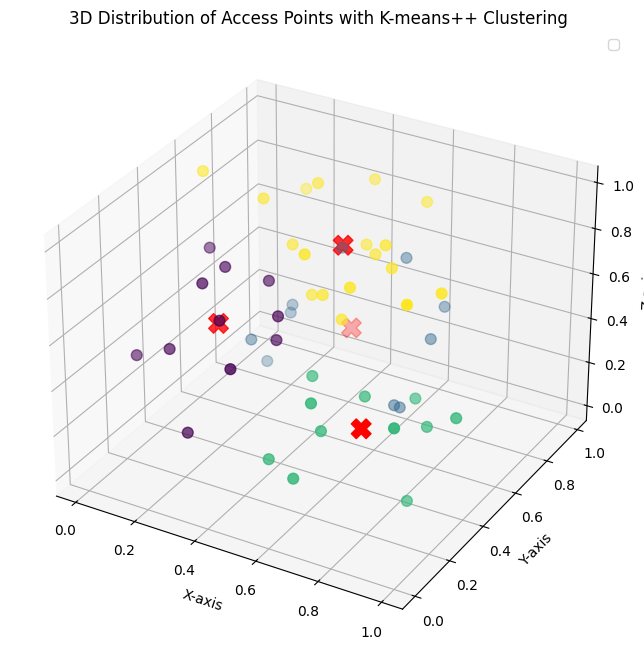

In [14]:
points = np.column_stack((x_coords, y_coords, z_coords))
n_clusters = 4

# Implement KMeans clustering with k-means++ initialization
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=42)
kmeans.fit(points)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Create a 3D scatter plot of the APs colored by cluster label
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for APs
sc = ax.scatter(x_coords, y_coords, z_coords, c=labels, cmap='viridis', marker='o', s=60)
# Plot the cluster centers (centroids)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', marker='X', s=200)

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Distribution of Access Points with K-means++ Clustering')
ax.legend()

plt.show()